<a href="https://colab.research.google.com/github/ZacharySoo01/I320D_AppliedML_Project/blob/main/Microbusiness_Density_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Preprocessing (Zach)
In this section, we performed Data Preprocessing techniques on the given datasets.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

# Read the train, test, and starter datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("revealed_test.csv")
census_starter_df = pd.read_csv("census_starter.csv")

# Print all datasets
train_df
test_df
census_starter_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0
...,...,...,...,...,...,...,...
101667,48175_2022-05-01,48175,Goliad County,Texas,2022-05-01,1.674481,100.0
101668,48175_2022-06-01,48175,Goliad County,Texas,2022-06-01,1.657736,99.0
101669,48175_2022-07-01,48175,Goliad County,Texas,2022-07-01,1.657736,99.0
101670,48175_2022-08-01,48175,Goliad County,Texas,2022-08-01,1.674481,100.0


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247
...,...,...,...,...,...,...,...
6265,56041_2022-12-01,56041,Uinta County,Wyoming,2022-12-01,4.050703,588
6266,56043_2022-11-01,56043,Washakie County,Wyoming,2022-11-01,3.143093,190
6267,56043_2022-12-01,56043,Washakie County,Wyoming,2022-12-01,3.060380,185
6268,56045_2022-11-01,56045,Weston County,Wyoming,2022-11-01,1.785395,100


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [ ]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0


In [ ]:
test_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [ ]:
census_starter_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


Here, I combined the census starter data columns to the test and training datasets, since there were missing features and labels from both datasets.

In [ ]:
# Merge the census starter data on the cfips column
train_df = pd.merge(train_df, census_starter_df, on=["cfips"])
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101667,48175_2022-05-01,48175,Goliad County,Texas,2022-05-01,1.674481,100.0,61.3,62.3,67.0,...,2.0,2.0,1.1,1.2,1.9,56737,60492.0,60690,50000.0,52335.0
101668,48175_2022-06-01,48175,Goliad County,Texas,2022-06-01,1.657736,99.0,61.3,62.3,67.0,...,2.0,2.0,1.1,1.2,1.9,56737,60492.0,60690,50000.0,52335.0
101669,48175_2022-07-01,48175,Goliad County,Texas,2022-07-01,1.657736,99.0,61.3,62.3,67.0,...,2.0,2.0,1.1,1.2,1.9,56737,60492.0,60690,50000.0,52335.0
101670,48175_2022-08-01,48175,Goliad County,Texas,2022-08-01,1.674481,100.0,61.3,62.3,67.0,...,2.0,2.0,1.1,1.2,1.9,56737,60492.0,60690,50000.0,52335.0


In [ ]:
# Merge the census starter data on the cfips column
test_df = pd.merge(test_df, census_starter_df, on=["cfips"])
test_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247,57.2,60.4,60.5,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,56041_2022-12-01,56041,Uinta County,Wyoming,2022-12-01,4.050703,588,83.8,88.2,89.5,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
6266,56043_2022-11-01,56043,Washakie County,Wyoming,2022-11-01,3.143093,190,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6267,56043_2022-12-01,56043,Washakie County,Wyoming,2022-12-01,3.060380,185,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6268,56045_2022-11-01,56045,Weston County,Wyoming,2022-11-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


I then dropped duplicates and null values from the datasets.

In [ ]:
# Drop duplicates and null values for both datasets
train_df = train_df.drop_duplicates()
train_df = train_df.dropna()
test_df = test_df.drop_duplicates()
test_df = test_df.dropna()

After that I printed the info of the datasets.

In [ ]:
# Print info to verify results
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101632 entries, 0 to 101670
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 101632 non-null  object 
 1   cfips                  101632 non-null  int64  
 2   county                 101632 non-null  object 
 3   state                  101632 non-null  object 
 4   first_day_of_month     101632 non-null  object 
 5   microbusiness_density  101632 non-null  float64
 6   active                 101632 non-null  float64
 7   pct_bb_2017            101632 non-null  float64
 8   pct_bb_2018            101632 non-null  float64
 9   pct_bb_2019            101632 non-null  float64
 10  pct_bb_2020            101632 non-null  float64
 11  pct_bb_2021            101632 non-null  float64
 12  pct_college_2017       101632 non-null  float64
 13  pct_college_2018       101632 non-null  float64
 14  pct_college_2019       101632 non-null  f

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 6269
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   row_id                 6264 non-null   object 
 1   cfips                  6264 non-null   int64  
 2   county                 6264 non-null   object 
 3   state                  6264 non-null   object 
 4   first_day_of_month     6264 non-null   object 
 5   microbusiness_density  6264 non-null   float64
 6   active                 6264 non-null   int64  
 7   pct_bb_2017            6264 non-null   float64
 8   pct_bb_2018            6264 non-null   float64
 9   pct_bb_2019            6264 non-null   float64
 10  pct_bb_2020            6264 non-null   float64
 11  pct_bb_2021            6264 non-null   float64
 12  pct_college_2017       6264 non-null   float64
 13  pct_college_2018       6264 non-null   float64
 14  pct_college_2019       6264 non-null   float64
 15  pct_colle

# Exporatory Data Analysis (EDA) (Bryce and Zach)
In this section, we conducted Exporatory Data Analysis to explore patterns within the dataset.

Here, I plotted the mean microbusiness density curve over time for all US cities.

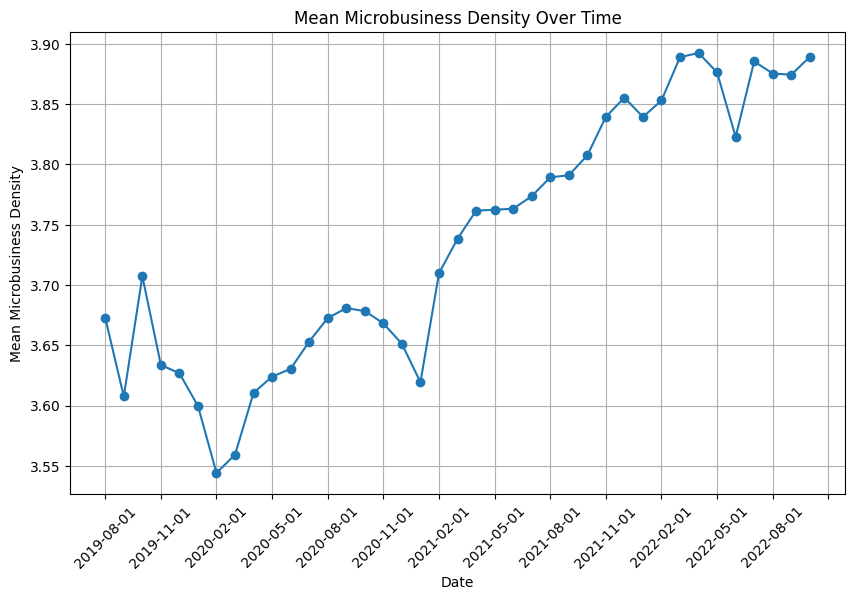

In [ ]:
import matplotlib.pyplot as plt

# Mean Microbusiness Density of all counties
plt.figure(figsize=(10, 6))
mean_density = train_df.groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plt.plot(mean_density['first_day_of_month'], mean_density['microbusiness_density'], marker='o')
plt.title('Mean Microbusiness Density Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Microbusiness Density')

# Set tick locator to a specified interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))  # Set tick locator to every 3 months

plt.grid(True)
plt.show();


Observations
- Mean microbusiness density slowly increased from 2019 to 2022.

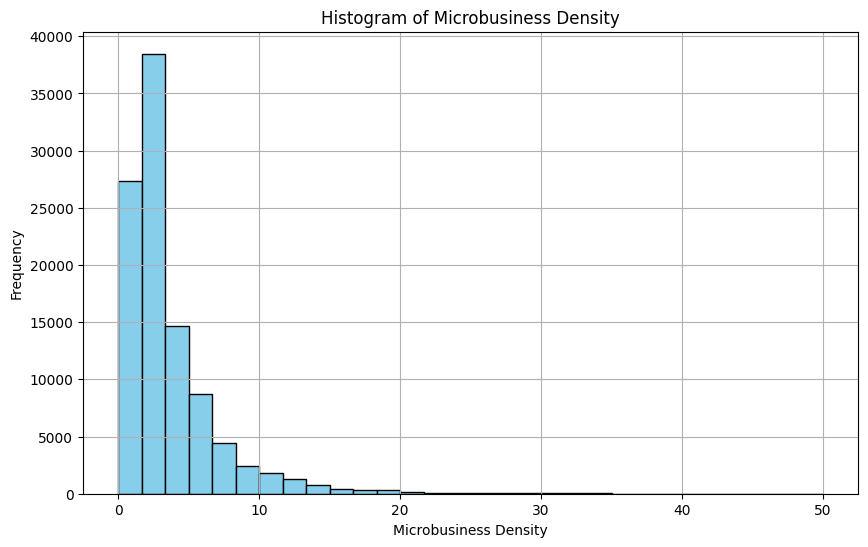

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df['microbusiness_density'], bins=30, range=(0, 50), color='skyblue', edgecolor='black')
plt.title('Histogram of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();


Most Microbusiness density levels are under 50 and majority of them fall under 10. Which means less than 10 microbusiness per every 100 people is most common.

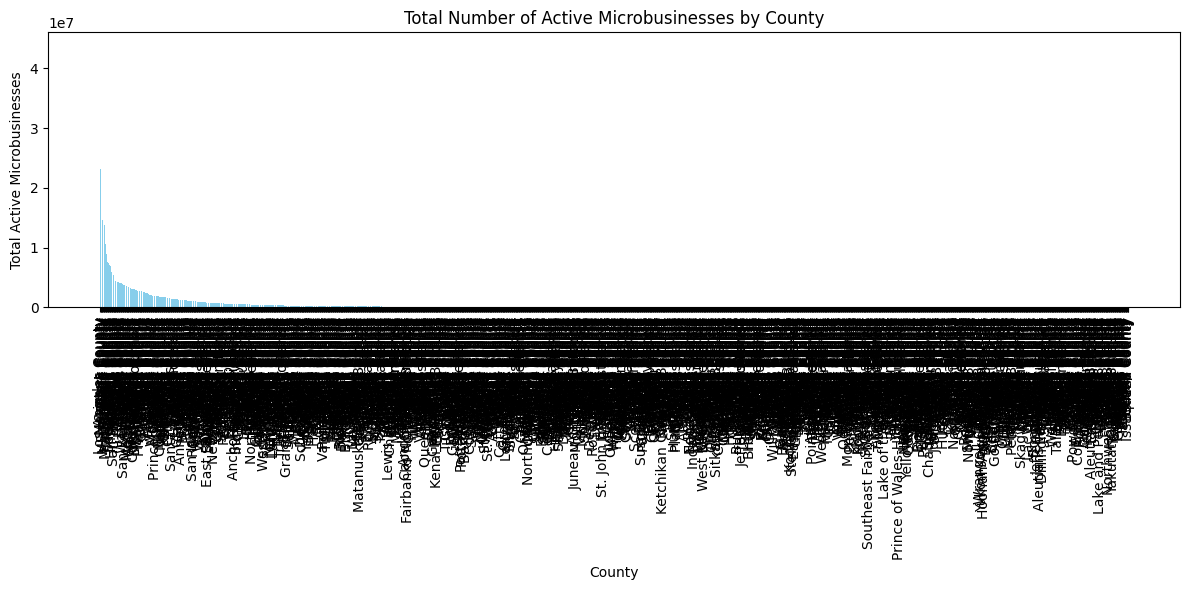

In [ ]:
import matplotlib.pyplot as plt

# Group by county and calculate the total number of active microbusinesses
county_active_counts = train_df.groupby('county')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
county_active_counts = county_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(county_active_counts['county'], county_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by County')
plt.xlabel('County')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();


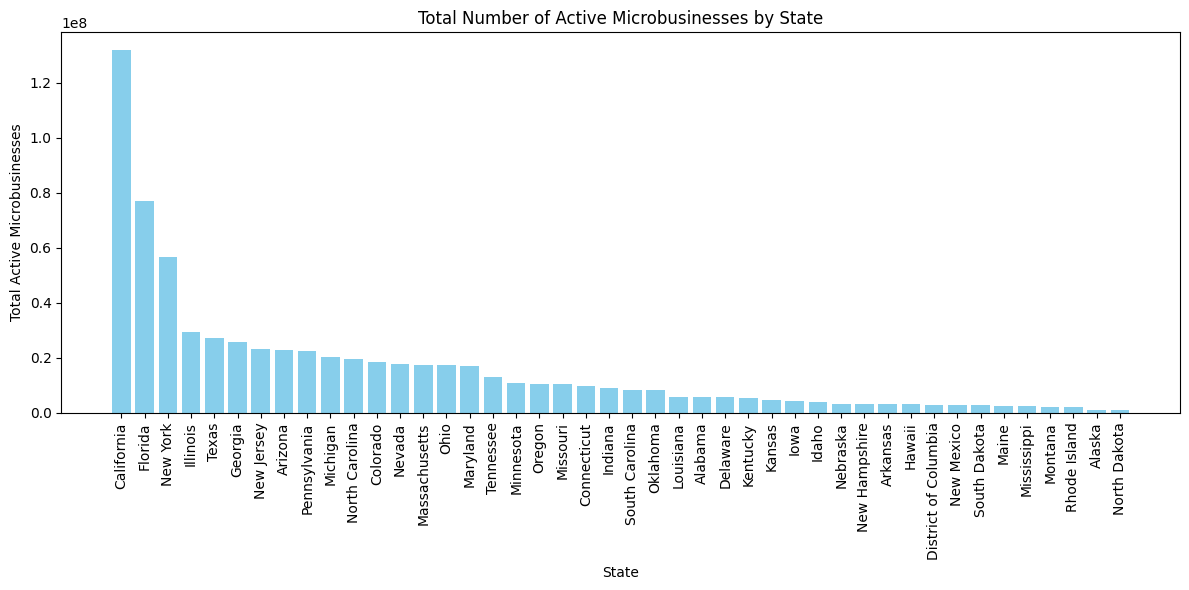

Top 5 States with the Highest Active Microbusinesses:
         state       active
4   California  131742878.0
9      Florida   77140048.0
32    New York   56486106.0
13    Illinois   29174283.0
43       Texas   27045240.0


In [ ]:
# Group by state and calculate the total number of active microbusinesses
state_active_counts = train_df.groupby('state')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
state_active_counts = state_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_active_counts['state'], state_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by State')
plt.xlabel('State')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the top 5 states with the highest number of active microbusinesses
top_states = state_active_counts.head(5)
print("Top 5 States with the Highest Active Microbusinesses:")
print(top_states);


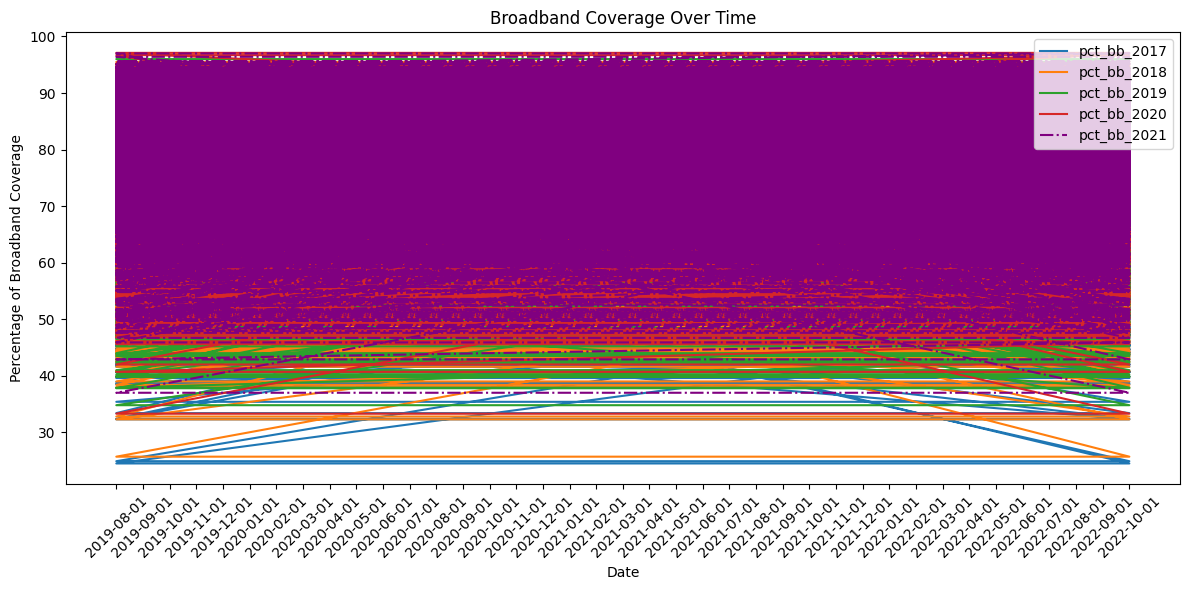

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
bb_coverage_columns = ['first_day_of_month', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']
bb_coverage_df = train_df[bb_coverage_columns]

# Set 'first_day_of_month' as the index
bb_coverage_df.set_index('first_day_of_month', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
for column in bb_coverage_df.columns:
    if column == 'pct_bb_2021':  # Adjust the color and line style for the purple line
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column, color='purple', linestyle='-.')
    else:
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column)

plt.title('Broadband Coverage Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Broadband Coverage')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();